In [13]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import sys
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

In [2]:
#set FIXED variables
#HOMEPATH = "/home/ubuntu/fastai/"
DATATPATH = "/home/ubuntu/fastai/data/urbanSound8k/"


In [3]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

In [ ]:
sound_file_paths = ["57320-0-0-7.wav","24074-1-0-3.wav","15564-2-0-1.wav","31323-3-0-1.wav","46669-4-0-35.wav",
                   "89948-5-0-0.wav","40722-8-0-4.wav","103074-7-3-2.wav","106905-8-0-0.wav","108041-9-0-4.wav"]
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music"]

raw_sounds = load_sound_files(sound_file_paths)

In [ ]:
plot_waves(sound_names,raw_sounds)
plot_specgram(sound_names,raw_sounds)
plot_log_power_specgram(sound_names,raw_sounds)

In [14]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    errorFiles = []
    features, labels = np.empty((0,193)), np.empty(0)
    print ("features:", features.shape)
    print ("labels:", labels.shape)
    for label, sub_dir in enumerate(sub_dirs):
        subDirErrorCount = 0
        print ("sub_dir:", sub_dir)
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
                print ("fn:", fn)
                mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
                ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
                features = np.vstack([features,ext_features])
                labels = np.append(labels, fn.split('/')[8].split('-')[1])
            except:
                errorFiles.append(fn)
                subDirErrorCount += 1
                print ("sys.exc_info()[0]:", sys.exc_info()[0])
        print ("error count :", subDirErrorCount)
    print ("total error Count :", len(errorFiles))
    print (errorFiles)
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [15]:
#parent_dir = 'Sound-Data'
parent_dir = DATATPATH+'audio/'
print (parent_dir)

sub_dirs = ['fold1','fold2','fold3']
features, labels = parse_audio_files(parent_dir,sub_dirs)

/home/ubuntu/fastai/data/urbanSound8k/audio/
sub_dir: fold1
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/87275-1-5-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176714-2-0-40.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-1-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-42.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/125791-3-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/102842-3-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/99180-9-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46656-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/191431-9-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/26270-9-0-32.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-29-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-2.wav
fn: /home/ubuntu/

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/73277-9-0-24.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/31323-3-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-27.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164312-3-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-15.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/138031-2-0-28.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-28.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176257-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/203356-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/40722-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193394-3-0-10.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108041-9-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/83199-9-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/197318-6-7-0.wav


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/9031-3-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/184355-1-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/151977-0-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/175851-1-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/122690-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/146186-5-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/119455-5-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164312-3-4-0.wav
fn: /home/

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/146186-5-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/40722-8-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/182800-2-2-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/59277-0-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/151977-0-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/88466-7-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/65749-3-1-9.wav
fn: /h

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/97317-2-0-22.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/59277-0-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-40.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/31323-3-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/194732-9-0-95.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/138031-2-0-47.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193698-2-0-89.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/73277-9-0-0.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77766-9-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/26270-9-0-19.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-30.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/114587-3-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-7-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/147764-4-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174276-7-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-1-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/31323-3-0-20.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108041-9-0-2.wav
fn: /hom

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193698-2-0-140.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/69304-9-0-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/197318-6-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118101-3-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/127873-0-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-31.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/119455-5-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/162540-1-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/191431-9-0-66.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-32.wav
fn:

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-13-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77766-9-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/124489-9-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-26.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/125791-3-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/26270-9-0-30.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/98223-7-9-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-79.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/105415-2-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-13.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-2.wav
fn: /

/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1632: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1645: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174276-7-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-52.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/106905-8-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176258-3-1-13.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/89948-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/98223-7-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-17.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/101415-3-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/125791-3-0-13.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-4-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-26.wav
fn

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-24.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-30.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/147764-4-4-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-31.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-35.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176714-2-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/65749-3-1-24.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/59277-0-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/147764-4-4-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/182800-2-2-1.wav
fn: /

/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1632: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1645: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/71087-4-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-36.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/65749-3-1-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/26270-9-0-23.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118279-8-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/155202-9-0-135.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/146186-5-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/72261-3-0-17.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176258-3-1-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/143651-2-0-39.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-30.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-2-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-0-2.wav
fn

/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1632: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1645: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-88.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/7383-3-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/30823-8-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/191431-9-0-61.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-4-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/197318-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/106905-8-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-26.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-17.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118279-8-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-39.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-50.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/135776-2-0-50.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/155202-9-0-42.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/143651-2-0-55.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174276-7-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/14113-4-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77766-9-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-20.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57584-4-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-39.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-8.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-105.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-80.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/44736-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108041-9-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-3-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-20.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/73277-9-0-19.wav
fn

/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1632: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/usr/local/lib/python3.5/dist-packages/librosa/util/utils.py:1645: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/191431-9-0-30.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/119455-5-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-13.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-4-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/73277-9-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/192124-2-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-37.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/7061-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-23.wav
fn: /

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/146186-5-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-30.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/130030-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/72579-3-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/194732-9-0-175.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/135776-2-0-90.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/194732-9-0-191.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/98223-7-7-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/72261-3-0-23.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/119455-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46656-6-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/40722-8-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/155202-9-0-124.wav
fn

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164312-3-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-24.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/124489-9-0-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/17592-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-72.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/124489-9-0-17.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/76093-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/9031-3-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193394-3-0-4.wav


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193698-2-0-113.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164053-8-2-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46918-5-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/166268-3-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/99180-9-0-48.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-13.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57584-4-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-10.wav
fn: /

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57584-4-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/192124-2-0-15.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46656-6-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-1-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-30-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-19.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/105415-2-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/22962-4-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180256-3-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118279-8-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/59277-0-0-3.wav
fn: /ho

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-25.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/151977-0-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-17.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/97317-2-0-28.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118279-8-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/150341-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/17592-5-1-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/119455-5-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/162703-1-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-14.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/194732-9-0-126.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/203356-3-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/86278-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174276-7-5-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-31.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/161702-9-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/99180-9-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/139951-9-0-45.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-22.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/162540-1-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/31840-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/196065-2-0-0.wav
fn:

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-4-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/96920-9-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/179866-1-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-52.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60591-2-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60605-9-0-73.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159750-8-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-4-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/163460-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-0-0.wav
fn: /h

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/104817-4-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-20.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189991-0-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/180126-4-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113785-3-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-100.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/143970-5-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/112195-3-0-48.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-3-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/152908-5-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-1-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74495-3-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-11.wav
fn

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60605-9-0-64.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-17-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/145608-6-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-10-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/98202-9-1-27.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/79377-9-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-151.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/158597-2-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-2-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189023-0-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/156893-7-6-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189023-0-0-13.wav
fn

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/76086-4-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/93193-9-1-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-4-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-5-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-4-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/109703-2-0-48.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-4-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-6-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/182739-2-0-35.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/96920-9-0-3.wav
fn: /h

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/162541-1-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/91396-8-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/149254-9-0-56.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178521-2-0-69.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/197320-6-11-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-5-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189023-0-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102871-8-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174994-3-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-7-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/158597-2-0-85.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/73623-7-6-0.wav
fn: 

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/156893-7-9-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/98202-9-1-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/77751-4-9-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178521-2-0-86.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/168713-9-0-82.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74226-9-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/160011-2-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189991-0-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-1-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-64.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/162541-1-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/166421-3-0-29.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/76086-4-0-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/77751-4-8-0.wav
fn: /

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-7-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/192269-2-0-35.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-2-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102104-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60591-2-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74458-9-1-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/204773-3-8-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/194841-9-0-130.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/49808-3-1-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178520-2-0-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/156893-7-3-0.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/106015-5-0-15.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/104817-4-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-4-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-5-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/185800-4-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-27.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-6-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-4-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/77751-4-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-4-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-2-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-18.wav
fn: /h

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60591-2-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/177592-5-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/106015-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/33849-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102871-8-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-4-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-5-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/132073-1-4-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-15-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-3-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-7-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/40717-8-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/155129-1-1-0.wav
fn: /home/

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/152908-5-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/22347-3-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178520-2-0-23.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/40717-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/145608-6-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-22.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-5-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/79377-9-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/104817-4-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/196384-9-0-16.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/192269-2-0-56.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/106015-5-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/108187-3-4-0.wav
fn: /h

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/94710-5-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/54545-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/172593-2-0-28.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/77751-4-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-140.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/182739-2-0-62.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/145608-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102871-8-0-14.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/96475-9-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74226-9-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-93.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/160011-2-0-34.wav
fn: 

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-11.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-41.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72539-3-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/97193-3-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/18581-3-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/108187-3-3-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159750-8-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74458-9-1-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178520-2-0-39.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/112195-3-0-80.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-4-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-4.wav
fn:

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/39970-9-0-142.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60605-9-0-34.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/44735-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-1-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/97193-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/109703-2-0-32.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/152908-5-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102871-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/194841-9-0-48.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/77751-4-7-0.wav
fn: /ho

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/98681-9-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/195451-5-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/162431-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/63095-4-1-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/90014-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/195451-5-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/69598-4-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/63095-4-1-33.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54898-8-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/29721-4-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54898-8-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/90014-8-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-0-24.wav
fn: /home/ub

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/78326-9-0-6.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-46.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/44831-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/69598-4-6-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/76221-2-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/177742-0-0-214.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/63292-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/30204-0-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/188824-7-8-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/162436-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/132855-2-0-90.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/172315-9-0-203.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/17853-5-0-1.wav
fn: /hom

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-50.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/195451-5-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54067-2-0-71.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/30204-0-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/6988-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/66622-4-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/112075-5-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/52077-3-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/180057-9-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/115536-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/12647-3-2-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/177742-0-0-10.wav
fn: /home

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/63095-4-1-23.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/188824-7-12-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/176783-3-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/69598-4-5-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/159761-0-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/15356-2-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-40.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/144068-5-4-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/37560-4-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/144068-5-4-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/172315-9-0-224.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/78326-9-0-7.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/200161-3-6-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/42097-7-0-2.wav
fn: /hom

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-61.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/199769-1-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-58.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/177742-0-0-36.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/42117-8-0-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/138473-9-0-29.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/177742-0-0-84.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-0-21.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/88569-2-0-54.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-0-18.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/19496-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/144068-5-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-29.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/155263-2-0-22.wav
fn

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/159761-0-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/30204-0-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/182103-9-0-26.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/197074-3-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-19.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/199769-1-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/179386-3-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/172315-9-0-113.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/90014-8-0-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/199769-1-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-11.wav
fn: /h

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-10.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-35.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/107228-5-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/58806-0-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/33696-3-6-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/103199-4-2-9.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54898-8-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54898-8-0-5.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/41372-3-0-39.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/66622-4-0-4.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-73.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-27.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/153261-0-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/185373-9-1-17.wav
fn: /home

fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/144068-5-4-2.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/186334-2-0-35.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/58857-2-0-13.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/66622-4-0-8.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/61791-9-1-40.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/110622-6-0-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-0-12.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/63095-4-0-26.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/44831-3-1-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/78326-9-0-3.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/165039-7-17-0.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-1.wav
fn: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/49809-3-0-0.wav
fn: /home/

In [19]:
print ("features:", type(features), features.shape)
print ("labels:", type(labels), labels.shape)
#print (features[0])
print (np.min(features), np.amax(features))
print (labels[0:10])

features: <class 'numpy.ndarray'> (2682, 193)
labels: <class 'numpy.ndarray'> (2682,)
-761.113623611 2417.22649782
[1 2 2 7 0 3 3 9 6 9]


In [20]:
labels = one_hot_encode(labels)

train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]

In [21]:
print ("labels:", type(labels), labels.shape)
print ("train_x:", type(train_x), train_x.shape)
print ("train_y:", type(train_y), train_y.shape)
print ("test_x:", type(test_x), test_x.shape)
print ("test_y:", type(test_y), test_y.shape)

labels: <class 'numpy.ndarray'> (2682, 10)
train_x: <class 'numpy.ndarray'> (1927, 193)
train_y: <class 'numpy.ndarray'> (1927, 10)
test_x: <class 'numpy.ndarray'> (755, 193)
test_y: <class 'numpy.ndarray'> (755, 10)


--------------------------------------------------------------------------------------------------------------------------

#### Training Neural Network with TensorFlow

In [22]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [23]:
training_epochs = 5000
n_dim = features.shape[1]
n_classes = 10
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [24]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [25]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


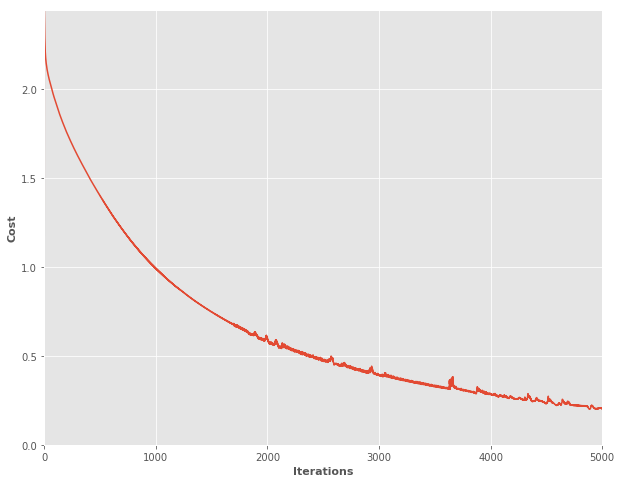

F-Score: 0.882


In [29]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))

In [ ]:
#now predict test_x[0] and compare with test_y[0]
